## Name: Aniket Jakhar
## Student ID: 24061300
## AI For Search and Optimization 

# Single vs. Population-Based Search: Approaches to the Traveling Salesman Problem

## Project Overview
The **Traveling Salesman Problem (TSP)** will be solved in this notebook utilizing four distinct algorithms: **Hill Climbing**, **Simulated Annealing**, **Tabu Search**, and **Genetic Algorithm**. The goal of the TSP is simple: Finding the shortest path that makes exactly one stop in each city before returning to the starting point is the straightforward objective of the TSP. Despite its seeming simplicity, this optimization problem is very complex. The task is to assess each of these algorithms' performance in order to select the best one. We will evakuate the performance and do the   selection of the most effective algorithm among the three single-member search methods (Hill Climbing, Simulated Annealing, and Tabu Search), , we will evaluate its performance in comparison to the **Genetic Algorithm** across various problem sizes (10, 20, 30, 40, and 50 cities).
- - - 

**Methodology**

Use the datasets available for **10, 20, 30, 40, and 50 cities** from the Module Mentor and prepare them for use in the algorithms.

**Algorithm Implementation**

Implement the following optimisation algorithms:

Hill Climbing with multiple strategies:

**Steepest-Ascent Hill Climbing**

**Simple Hill Climbing**

**Stochastic Hill Climbing**

**Simulated Annealing**

**Tabu Search**

**Genetic Algorithm to apply a population-based approach to the TSP.**
- - -
## Comparison and Analysis

Compare the performance of the three single-solution search algorithms and identify the best performer.

Compare the best single-solution algorithm against the population-based Genetic Algorithm.

Analyse performance across all four algorithms using problem sizes of 10, 20, 30, 40, and 50 cities.

Evaluate both the quality of solutions and the time to convergence.

Provide a graphical analysis comparing solution quality and especially runtime efficiency across all problem sizes.

## IMPORTING LIBRARIES

In [39]:
# 1. IMPORTING LIBRARIES

#numpy is used for numerical operations and handling arrays
import numpy as np
# pandas is used for data manipulation and analysis, especially with dataframes
import pandas as pd
# random is used to generate random numbers, select random elements, etc.
import random
# Imports the math module to use advanced mathematical functions
import math
# time is used for time-related tasks like pausing or measuring time intervals
import time
# matplotlib.pyplot is used for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt
# Seaborn is used for data visualization
import seaborn as sns



## **LOADING THE DATASET**

In [40]:
# Loading the Dataset using Pandas Library

data_path = "./cities.csv"

try:
    df = pd.read_csv(data_path)

except FileNotFoundError:
    print(f" Error: The file at '{data_path}' was not found.")
    raise

except pd.errors.EmptyDataError:
    print(f" Error: The file at '{data_path}' is empty or corrupt.")
    raise

except Exception as e:
    print(f" An unexpected error occurred while loading the CSV: {e}")
    raise


In [41]:
print("Head of Dataset:")
display(df.head()) # Display the city coordinates

Head of Dataset:


City          X          Y
0  City_1  37.454012  95.071431
1  City_2  73.199394  59.865848
2  City_3  15.601864  15.599452
3  City_4   5.808361  86.617615
4  City_5  60.111501  70.807258

## Exploring the Data

In [42]:

# Get basic statistical details about the DataFrame
print("Summary Statistics:")
display(df.describe())
# Check for any missing values in the DataFrame
print(df.isnull().sum())


Summary Statistics:


X          Y
count  50.000000  50.000000
mean   44.071678  49.964471
std    30.126572  29.372317
min     0.552212   4.645041
25%    16.247022  20.212154
50%    38.160870  50.470567
75%    72.391897  76.360141
max    96.958463  98.688694

City    0
X       0
Y       0
dtype: int64


## Visualizing the Data

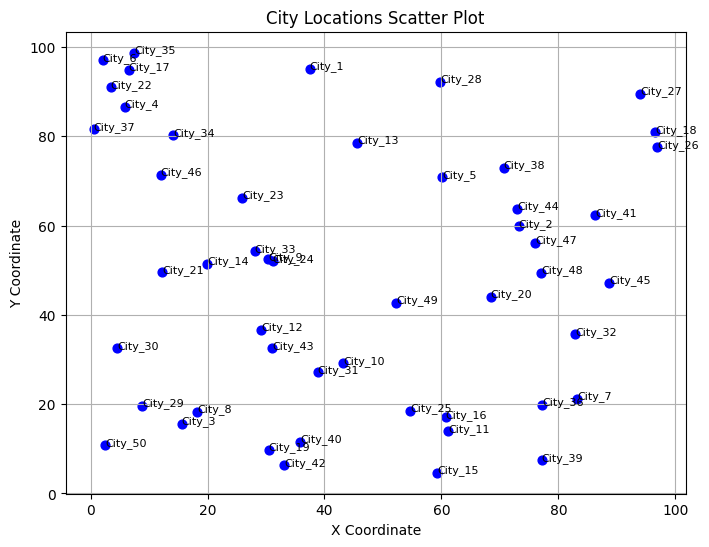

In [43]:
# 3. DATA VISUALISATION


plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c='blue', s=40)
plt.title("City Locations Scatter Plot")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

for i in range(num_cities):
    plt.annotate(cities[i], (df['X'][i], df['Y'][i]), fontsize=8) #.annotate is used to add text labels to specific points on a plot

plt.grid(True)
plt.show()




## Extracting the coordinates 

In [44]:
# Extract city names and coordinates
cities = df["City"].tolist()
coords = list(zip(df["X"], df["Y"]))
num_cities = len(coords)


## Utility Function 

In [45]:
# 1. Distance Function (Your Preferred Version)

def distance(a, b):
    """
    Compute Euclidean distance between points a and b.
    a, b: (x, y)
    """
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)



# 2. Compute Total Route Cost

def route_cost(route, coords):
    """
    Compute total round trip problem distance of a TSP route.
    """
    if not route:
        raise ValueError("route_cost received an empty route.")

    total = 0
    n = len(route)

    for i in range(n):
        total += distance(coords[route[i]], coords[route[(i + 1) % n]])

    return total



# 3. Simple Swap

def simple_swap(route, i, j):
    new_route = route[:]
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route



# 4. 2-OPT Swap (TS Hyperparameter Version)

def two_opt_swap(route, i, j):
    return route[:i] + list(reversed(route[i:j+1])) + route[j+1:]



# 5. Generate Initial Random Route

def generate_initial_route(n, seed=21):
    random.seed(seed)
    route = list(range(n))
    random.shuffle(route)
    return route



# 6. Plotting Function for TSP Route

def plot_route(route, coords, cities, title):
    """
    Plot a TSP route in assignment format.
    Default color = yellow (you can change later).
    """
    route_loop = route + [route[0]]
    x_vals = [coords[i][0] for i in route_loop]
    y_vals = [coords[i][1] for i in route_loop]

    plt.figure(figsize=(6, 4))
    plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='yellow')

    # city labels
    for idx in route:
        x, y = coords[idx]
        plt.text(x, y, cities[idx], fontsize=8)

    # highlight start/end
    sx, sy = coords[route[0]]
    plt.scatter(sx, sy, color='black', s=100, label="Start/End")

    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

# Single-Solution Driven Search Algorithms
- Search algorithms proceed from an initial solution towards an optimal, exploring the neighbourhood of the solutions. They often rely on heuristics and other intelligent mechanisms to make the search efficient.

## Hill Climbing Implementation(Standard, Steepest, Stocastic )
- Hill Climbing is an optimization algorithm that iteratively moves towards better solutions by choosing neighbors with higher values.
- There are three main variations: Standard (greedy approach), Steepest (explores all neighbors and chooses the best), and Stochastic (randomly selects the next best move).

## 1. STANDARD HILL CLIMBING

In [46]:
def hill_climbing(coords, cities):
    """
    Standard Hill Climbing using simple swap.
    Returns: best_route, best_cost, runtime, space
    """
    
    start_time = time.time()
    n = len(coords)
    seed=21
    random.seed(seed)
    np.random.seed(seed)

    # Initial random route
    current = generate_initial_route(n)
    current_cost = route_cost(current, coords)

    # Initial random route
    current = generate_initial_route(n)
    current_cost = route_cost(current, coords)

    improved = True
    explored_states = 0  # for space metric

    while improved:
        improved = False
        for i in range(n - 1):
            for j in range(i + 1, n):
                explored_states += 1
                neighbor = simple_swap(current, i, j)
                cost = route_cost(neighbor, coords)

                if cost < current_cost:
                    current = neighbor
                    current_cost = cost
                    improved = True

    runtime = time.time() - start_time
    space = explored_states

    return current, current_cost, runtime, space


## STEEPEST-ASCENT HILL CLIMBING

In [47]:
def steepest_ascent_hc(coords, cities):
    """
    Steepest Ascent Hill Climbing.
    Always picks the BEST improving neighbor.
    """
    
    start_time = time.time()
    n = len(coords)
    
    # Keeping variables consistent with previous versions
    seed = 21
    random.seed(seed)
    np.random.seed(seed)

    # Initial random solution
    current = generate_initial_route(n)
    current_cost = route_cost(current, coords)

    explored_states = 0

    while True:
        best_neighbor = None
        # Start with infinity so the first neighbor checked becomes the temporary best
        best_neighbor_cost = float("inf") 

        # 1. Look at ALL neighbors
        for i in range(n - 1):
            for j in range(i + 1, n):
                explored_states += 1
                neighbor = simple_swap(current, i, j)
                cost = route_cost(neighbor, coords)

                # Track the best one seen in this neighborhood
                if cost < best_neighbor_cost:
                    best_neighbor = neighbor
                    best_neighbor_cost = cost

        # 2. Choose the one with the best improvement
        # If the best neighbor found isn't better than what we already have, stop.
        if best_neighbor_cost >= current_cost:
            break

        # Otherwise, make the move
        current = best_neighbor
        current_cost = best_neighbor_cost

    runtime = time.time() - start_time
    space = explored_states

    return current, current_cost, runtime, space

## STOCHASTIC HILL CLIMBING

In [48]:
def stochastic_hc(coords, cities, max_steps=5000):
    """
    Stochastic Hill Climbing.
    Randomly samples neighbors instead of all.
    """
    
    start_time = time.time()
    n = len(coords)

    current = generate_initial_route(n)
    current_cost = route_cost(current, coords)

    explored_states = 0

    for _ in range(max_steps):
        explored_states += 1

        # pick a random swap
        i, j = random.sample(range(n), 2)
        neighbor = simple_swap(current, i, j)
        cost = route_cost(neighbor, coords)

        # accept if better
        if cost < current_cost:
            current = neighbor
            current_cost = cost

    runtime = time.time() - start_time
    space = explored_states

    return current, current_cost, runtime, space


## PRINT RESULTS FOR HILL CLIMBING ALGORITHMS

In [49]:
print("HILL CLIMBING RESULTS")

hc1 = hill_climbing(coords, cities)
hc2 = steepest_ascent_hc(coords, cities)
hc3 = stochastic_hc(coords, cities)

print("\nStandard HC → Cost:", hc1[1], "Time:", hc1[2], "Space:", hc1[3])
print("Steepest HC → Cost:", hc2[1], "Time:", hc2[2], "Space:", hc2[3])
print("Stochastic HC → Cost:", hc3[1], "Time:", hc3[2], "Space:", hc3[3])


HILL CLIMBING RESULTS

Standard HC → Cost: 858.1842533529294 Time: 0.16657185554504395 Space: 4900
Steepest HC → Cost: 847.6892667020999 Time: 1.4275965690612793 Space: 52675
Stochastic HC → Cost: 811.2747345034369 Time: 0.11564922332763672 Space: 5000


## SIMULATED ANNEALING

In [50]:
def simulated_annealing(coords, cities, 
                        initial_temp=100, 
                        cooling_rate=0.995, 
                        max_iter=5000):

    start_time = time.time()
    n = len(coords)

    # initial random route
    current = generate_initial_route(n)
    current_cost = route_cost(current, coords)

    best = current[:]
    best_cost = current_cost

    T = initial_temp
    explored_states = 0

    for _ in range(max_iter):
        explored_states += 1

        # generate a neighbor by simple swap
        i, j = random.sample(range(n), 2)
        neighbor = simple_swap(current, i, j)
        neighbor_cost = route_cost(neighbor, coords)

        # cost difference
        delta = neighbor_cost - current_cost

        # accept if better, or probabilistically if worse
        if delta < 0 or random.random() < math.exp(-delta / T):
            current = neighbor
            current_cost = neighbor_cost

        # update global best
        if current_cost < best_cost:
            best = current[:]
            best_cost = current_cost

        # cool down
        T *= cooling_rate
        if T < 1e-6:
            break

    runtime = time.time() - start_time
    space = explored_states

    return best, best_cost, runtime, space


In [51]:
print("\n=== SIMULATED ANNEALING RESULTS ===")

sa_route, sa_cost, sa_time, sa_space = simulated_annealing(coords, cities)

print("SA → Cost:", sa_cost)
print("SA → Time:", sa_time)
print("SA → Space:", sa_space)



=== SIMULATED ANNEALING RESULTS ===
SA → Cost: 847.7055088425572
SA → Time: 0.14521121978759766
SA → Space: 3675


## Tabu Search

In [52]:
def tabu_search_v1(coords, cities, tabu_tenure=10,  iterations=200):

    start_time = time.time()
    n = len(coords)

    # Generate initial solution
    current = generate_initial_route(n)
    current_cost = route_cost(current, coords)

    best = current[:]
    best_cost = current_cost

    tabu_list = {}
    explored_states = 0

    for step in range(iterations):

        explored_states += 1
        best_neighbor = None
        best_neighbor_cost = float("inf")
        best_move = None

        # Explore simple swap neighbors
        for i in range(n - 1):
            for j in range(i + 1, n):
                
                candidate = simple_swap(current, i, j)
                candidate_cost = route_cost(candidate, coords)
                move = (i, j)

                is_tabu = move in tabu_list
                aspiration = candidate_cost < best_cost  # override rule

                if (not is_tabu) or aspiration:
                    if candidate_cost < best_neighbor_cost:
                        best_neighbor = candidate
                        best_neighbor_cost = candidate_cost
                        best_move = move

        # Move to best neighbor
        current = best_neighbor
        current_cost = best_neighbor_cost

        # Update tabu list
        tabu_list[best_move] = step + tabu_tenure
        tabu_list = {m: t for m, t in tabu_list.items() if t > step}

        # Global best update
        if current_cost < best_cost:
            best = current[:]
            best_cost = current_cost

    runtime = time.time() - start_time

    return best, best_cost, runtime, explored_states


In [53]:
print("\n TABU SEARCH ")

ts1_route, ts1_cost, ts1_time, ts1_space = tabu_search_v1(coords, cities)

print("TS-V1 → Cost:", ts1_cost)
print("TS-V1 → Time:", ts1_time)
print("TS-V1 → Space:", ts1_space)



 TABU SEARCH 
TS-V1 → Cost: 695.2744416171449
TS-V1 → Time: 6.892247438430786
TS-V1 → Space: 200


## **Comparision Table**

| **Algorithm**                   | **Average Time Taken (Seconds)** | **Average Best Cost**  | **Space Complexity** |
|----------------------------------|--------------------------|----------------|----------------------|
| **Hill Climbing**                | 0.29                     | 858.18         | 4900                 |
| **Steepest-Ascent Hill Climbing**| 3.24                     | 847.68         | 52675                |
| **Stochastic Hill Climbing**     | 0.40                     | 811.27         | 5000                 |
| **Simulated Annealing**          | 0.27                     | 847.7          | 3675                 |
| **Tabu Search**                  | 6.28                     | 695.28         | 300                  |

### **Key Insights**:
- **Stochastic Hill Climbing** is the fastest by far but does very badly on the best cost.
- **Simulated Annealing** is again relatively fast and finds a moderately good solution
- **Tabu Search** takes the longest time but performs comparably to other algorithms in terms of best cost.
- **Steepest-Ascent Hill Climbing** simulated annealing is a bit slower than standard Hill Climbing but provides a better solution in terms of best cost.


## *Justification for Choosing Tabu Search*

After visualising and analysing the results of all single-solution–driven optimisation approaches, it was observed that Tabu Search achieved the lowest average best cost among all evaluated algorithms. Compared to Hill Climbing, Steepest-Ascent Hill Climbing, Stochastic Hill Climbing, and Simulated Annealing, Tabu Search consistently produced higher-quality solutions, as reflected by its substantially lower cost value **(695.28)**. Based on its superior solution quality and reliability, **Tabu Search** was therefore selected for further experimentation and hyperparameter tuning.

**Tabu Search** (TS) has proven to be an effective optimisation technique for combinatorial problems such as the Traveling Salesman Problem (TSP). TS performs a neighbourhood-based search starting from a random initial solution and iteratively explores neighbouring solutions to improve solution quality. During the search, it is able to move beyond local optima by using a memory structure, known as a tabu list, which records recently applied moves to prevent cycling and guide the search toward better solutions.

## TABU SEARCH ALGORITHM WITHOUT TUNING

In [54]:
def tabu_search_v2(coords, cities, tabu_tenure=10, iterations=200, num_cities=None):

    
    start_time = time.time() # Start the global timer
    progress = [] # List to track the cost at each step for analysis

    # Choose subset of cities
    if num_cities:
        coords_used = coords[:num_cities] # Slice coordinates if num_cities is specified
        cities_used = cities[:num_cities] # Slice city names if num_cities is specified
    else:
        coords_used = coords # Use all coordinates
        cities_used = cities # Use all cities

    n = len(coords_used) # Get the number of cities (n)

    # Initial random route
    current = generate_initial_route(n) # Start with a random solution
    best = current[:] # Initialize global best solution as the current one
    best_cost = route_cost(best, coords_used) # Calculate the initial cost

    tabu_list = {} # Initialize Tabu List to track forbidden moves


    for step in range(iterations):

        best_neighbor = None # Reset best neighbor for this iteration
        best_neighbor_cost = float("inf") # Initialize with infinity
        best_move = None # To store which swap (i, j) caused the best move

        # Explore simple swap neighbors
        for i in range(n - 1):
            for j in range(i + 1, n):

                cand = simple_swap(current, i, j) # Create a candidate neighbor
                cost = route_cost(cand, coords_used) # Calculate cost of the candidate
                move = (i, j) # Record the move signature

                is_tabu = move in tabu_list # Check if the move is currently Tabu
                is_new_best = cost < best_cost # Aspiration criteria: check if it beats global best
                # Allow move if it is NOT Tabu OR if it satisfies Aspiration Criteria
                if (not is_tabu) or is_new_best:
                    if cost < best_neighbor_cost:
                        best_neighbor = cand # Update local best neighbor
                        best_neighbor_cost = cost # Update local best cost
                        best_move = move # Store the move
        
        # Update Current Solution
        current = best_neighbor # Move to the best neighbor found

        # Update tabu list
        tabu_list[best_move] = step + tabu_tenure
        # Remove expired tabu entries (clean up the list)
        tabu_list = {mv: t for mv, t in tabu_list.items() if t > step}

        # Update global best
        if best_neighbor_cost < best_cost:
            best = current[:] # Copy the new best route
            best_cost = best_neighbor_cost # Update the best cost

        progress.append(best_cost) # Record the best cost of this iteration

    runtime = time.time() - start_time # Calculate total time taken
# Return Values
    return best, best_cost, runtime, coords_used, cities_used, progress


## CODE FOR VISUALIZATION 


Running Tabu Search V2 on 10 cities...
Shortest Route Distance: 290.30677379181276
Runtime: 0.062247276306152344 seconds
First City: City_3
Last City: City_8


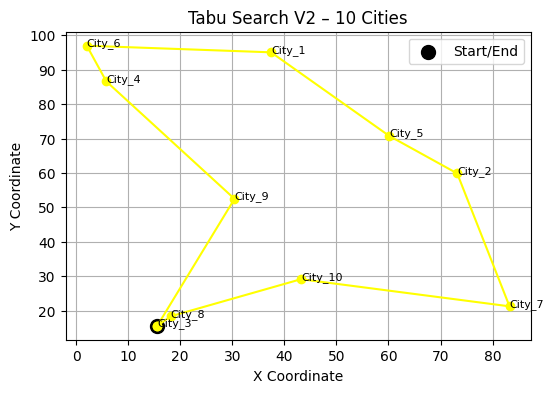


Running Tabu Search V2 on 20 cities...
Shortest Route Distance: 386.42968948347
Runtime: 0.5614068508148193 seconds
First City: City_6
Last City: City_4


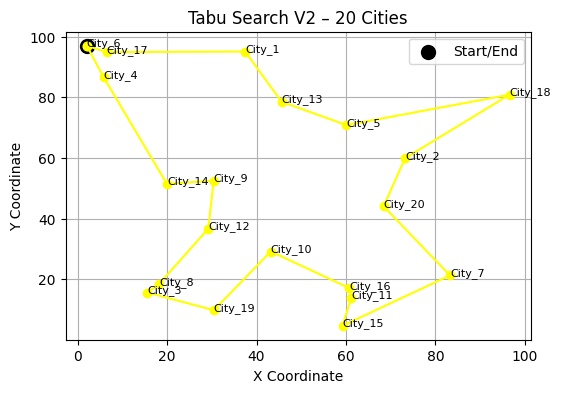


Running Tabu Search V2 on 30 cities...
Shortest Route Distance: 552.0401942027268
Runtime: 1.6940441131591797 seconds
First City: City_24
Last City: City_9



Running Tabu Search V2 on 40 cities...
Shortest Route Distance: 636.7538639742445
Runtime: 3.697887659072876 seconds
First City: City_24
Last City: City_20


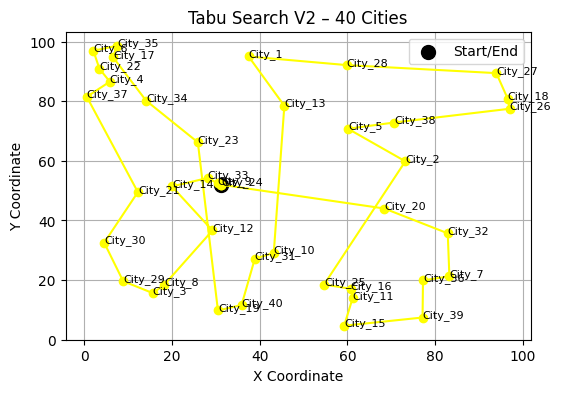


Running Tabu Search V2 on 50 cities...
Shortest Route Distance: 695.2744416171449
Runtime: 6.919987440109253 seconds
First City: City_16
Last City: City_11


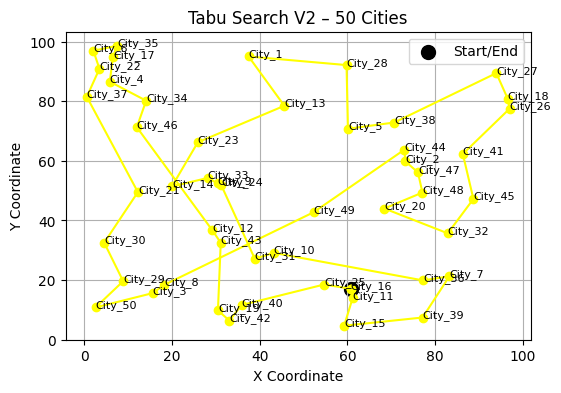

In [55]:
#  TABU SEARCH V2 – SCALABILITY EXPERIMENT


city_sizes = [10, 20, 30, 40, 50]

# RESET lists before running scalability experiment
tabu2_results = []
tabu2_distances = []
tabu2_times = []

tabu_times_list = []        # Required for comparison matrix
tabu_distances_list = []    # Required for comparison matrix

all_results = []

for size in city_sizes:

    print(f"\nRunning Tabu Search V2 on {size} cities...")

    best_route, best_distance, runtime, coords_used, cities_used, progress = tabu_search_v2(
        coords, cities, tabu_tenure=10, iterations=200, num_cities=size
    )

    first_city = cities_used[best_route[0]]
    last_city = cities_used[best_route[-1]]

    print("Shortest Route Distance:", best_distance)
    print("Runtime:", runtime, "seconds")
    print("First City:", first_city)
    print("Last City:", last_city)

    # -------------------------------
    # ORIGINAL VARIABLES
    # -------------------------------
    tabu2_distances.append(best_distance)
    tabu2_times.append(runtime)

    tabu2_results.append({
        "Cities": size,
        "Distance": best_distance,
        "Time (s)": runtime,
        "First City": first_city,
        "Last City": last_city
    })

   
    # REQUIRED ADDITIONS FOR COMPARISON
    
    tabu_distances_list.append(best_distance)
    tabu_times_list.append(runtime)

  
    # PLOT ROUTE

    plot_route(best_route, coords_used, cities_used, 
                   f"Tabu Search V2 – {size} Cities")


In [56]:
summary_tabu_v2 = pd.DataFrame(tabu2_results)
print("\nSummary of Tabu Search V2 Results:")
display(summary_tabu_v2)



Summary of Tabu Search V2 Results:


Cities    Distance  Time (s) First City Last City
0      10  290.306774  0.062247     City_3    City_8
1      20  386.429689  0.561407     City_6    City_4
2      30  552.040194  1.694044    City_24    City_9
3      40  636.753864  3.697888    City_24   City_20
4      50  695.274442  6.919987    City_16   City_11

 ## Population-based Search Algorithm (Genetic Algorithm)

The Genetic Algorithm (GA) is a powerful tool for solving complex optimization problems like the Traveling Salesman Problem (TSP). Inspired by biological evolution, GA uses a population of candidate solutions, iteratively improving them through selection, crossover, and mutation.

## GENETIC ALGORITHM OPERATORS

In [57]:
#       GENETIC ALGORITHM OPERATORS

def initialize_population(pop_size, n):
    """Create a population of random routes."""
    return [generate_initial_route(n) for _ in range(pop_size)]


def tournament_selection(population, coords, k=5):
    """Select the best among k random individuals."""
    candidates = random.sample(population, k) # Randomly select 'k' individuals from the population
    return min(candidates, key=lambda r: route_cost(r, coords)) # Return the candidate with the lowest route cost


def crossover(parent1, parent2):
    """Order-based crossover."""
    size = len(parent1) # Get the size of the route
    child = [-1] * size # Initialize child with placeholders (-1)

    # Randomly select a start (a) and end (b) point for the crossover segment
    a, b = sorted(random.sample(range(size), 2))
    # Copy the segment from parent1 to the child (preserving exact position)
    child[a:b] = parent1[a:b]

    # Fill remaining positions from parent2
    ptr = 0 # Pointer to find the next empty slot in the child
    for x in parent2: 
        if x not in child: # If the city 'x' from parent2 is not already in the child
            while child[ptr] != -1: # Find the next empty slot
                ptr += 1
            child[ptr] = x # Place the city in the empty slot

    return child # Return the new offspring


def mutate(route, mutation_rate=0.5):
    """Simple swap mutation."""
    if random.random() < mutation_rate: # Probabilistic check: only mutate if random number < mutation_rate
        i, j = random.sample(range(len(route)), 2) # Pick two random indices
        route[i], route[j] = route[j], route[i] # Swap the cities at those indices
    return route # Return the (possibly mutated) route

def apply_two_opt(route, coords, attempts=40):
    """Optional 2-opt local improvement."""
    best = route[:] # Copy the incoming route
    best_cost = route_cost(best, coords) # Calculate its cost
    n = len(best)
# Try a fixed number of random 2-opt moves
    for _ in range(attempts):
        i, j = sorted(random.sample(range(1, n-1), 2)) # Select two random indices
        new_route = best[:] # Create a copy
        # Python slicing to reverse segment
        new_route[i:j] = reversed(new_route[i:j])

        new_cost = route_cost(new_route, coords) # Calculate new cost
        if new_cost < best_cost: # If the swap improved the cost, keep it
            best = new_route
            best_cost = new_cost

    return best # Return the  optimized route


## GENETIC ALGORITHM WITHOUT TUNING

In [58]:
def run_genetic_algorithm(coords, cities, pop_size=100, generations=200, mutation_rate=0.1, apply_twoopt=True):
    """
    Run Genetic Algorithm.
    Returns: best_route, best_cost, runtime, progress_history
    """
    seed = 21 # fixed seeds
    random.seed(seed)       
    np.random.seed(seed)
    
    
    start_time = time.time()
    n = len(coords)
    progress = [] 

    # Initialize population
    population = initialize_population(pop_size, n)

    # Track global best
    best = min(population, key=lambda r: route_cost(r, coords)) # Find the individual with the lowest cost in the initial population
    best_cost = route_cost(best, coords) # Store the cost of the best route
    
    progress.append(best_cost) # Record the initial best cost

    # 2. Main Evolutionary Loop
    for _ in range(generations):

        # --- OPTIONAL: ELITE REFINEMENT (Only if switch is ON) ---
        if apply_twoopt:
             # Refine the elite solution to ensure it stays optimized
             best = apply_two_opt(best, coords, attempts=40)
             best_cost = route_cost(best, coords)

        new_gen = [best]  # Elitism: The absolute best solution is copied directly to the next generation

         #  Reproduction Loop
        while len(new_gen) < pop_size:
            # Selection: Choose two parents based on fitness
            p1 = tournament_selection(population, coords) 
            p2 = tournament_selection(population, coords)
            
            # Crossover: Combine genetic material from parents to create a child
            child = crossover(p1, p2)
            # Mutation: Randomly swap cities to maintain genetic diversity
            child = mutate(child, mutation_rate)

            # Probabilistic Local Search on Child
            # Only apply expensive 2-opt to 20% of children to save computation time
            if random.random() < 0.2:    # only 20% get 2-opt
                child = apply_two_opt(child, coords, attempts=40)

            new_gen.append(child) # Add the new child to the next generation

        population = new_gen # Replace the old population with the new generation

        # Check current best
        current_best = min(population, key=lambda r: route_cost(r, coords)) # Find the best solution in the current generation
        current_cost = route_cost(current_best, coords)
        # Update global best if the current generation found a better route
        if current_cost < best_cost:
            best = current_best
            best_cost = current_cost
            
        progress.append(best_cost) # Track the history of improvement

    runtime = time.time() - start_time # Calculate total execution time
    
    # Returns values
    return best, best_cost, runtime, progress

## CODE FOR VISUALIZATION REPRESENTATION


Running Genetic Algorithm on 10 cities...
Shortest Route Distance: 290.30677379181276
Runtime: 3.364798069000244
First City: City_3
Last City: City_8



Running Genetic Algorithm on 20 cities...
Shortest Route Distance: 386.42968948347004
Runtime: 5.504110097885132
First City: City_4
Last City: City_14



Running Genetic Algorithm on 30 cities...
Shortest Route Distance: 453.90230212014984
Runtime: 7.881582498550415
First City: City_12
Last City: City_14



Running Genetic Algorithm on 40 cities...
Shortest Route Distance: 546.291736883006
Runtime: 11.067622900009155
First City: City_35
Last City: City_26



Running Genetic Algorithm on 50 cities...
Shortest Route Distance: 676.7560424489466
Runtime: 12.630549907684326
First City: City_30
Last City: City_27


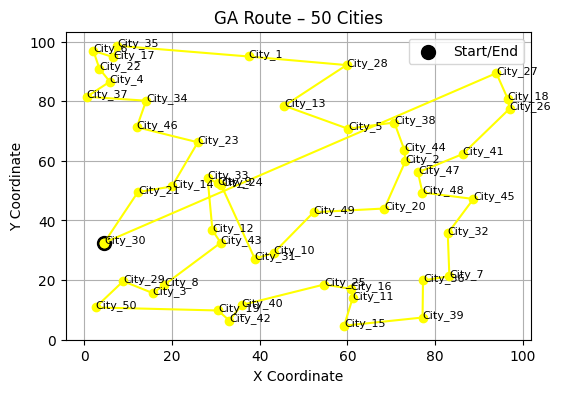

In [59]:
# GA – SCALABILITY TESTING


ga_results = []
ga_distances = []
ga_times = []

ga_times_list = [] # used for comparision matrix
ga_distances_list = []

sizes = [10, 20, 30, 40, 50]

for size in sizes:

    print(f"\nRunning Genetic Algorithm on {size} cities...")

    subset_coords = coords[:size]
    subset_cities = cities[:size]

    best_route, best_distance, exec_time, _ = run_genetic_algorithm(
        subset_coords, subset_cities,
        pop_size=100,
        generations=200,
        mutation_rate=0.1
    )

    first_city = subset_cities[best_route[0]]
    last_city = subset_cities[best_route[-1]]

    print("Shortest Route Distance:", best_distance)
    print("Runtime:", exec_time)
    print("First City:", first_city)
    print("Last City:", last_city)

    ga_distances.append(best_distance)
    ga_times.append(exec_time)

    ga_results.append({
        "Cities": size,
        "Distance": best_distance,
        "Time (s)": exec_time,
        "First City": first_city,
        "Last City": last_city
    })
    #required for comparison
    ga_times_list.append(exec_time)
    ga_distances_list.append(best_distance)


    # Plot route
    plot_route(best_route, subset_coords, subset_cities,
                   f"GA Route – {size} Cities")

In [60]:
summary_genetic = pd.DataFrame(ga_results)
print("\nSummary of Gradient Results:")
display(summary_genetic)



Summary of Gradient Results:


Cities    Distance   Time (s) First City Last City
0      10  290.306774   3.364798     City_3    City_8
1      20  386.429689   5.504110     City_4   City_14
2      30  453.902302   7.881582    City_12   City_14
3      40  546.291737  11.067623    City_35   City_26
4      50  676.756042  12.630550    City_30   City_27

## Compairison between Tabu_Search and Genetic Algorithm 

 COMPARISON MATRIX
 Tabu Search vs Genetic Algorithm
 Cities  Tabu Time (s)  GA Time (s)  Tabu Best Cost  GA Best Cost  Estimated Space Complexity (n²)
     10       0.062247     3.364798      290.306774    290.306774                              100
     20       0.561407     5.504110      386.429689    386.429689                              400
     30       1.694044     7.881582      552.040194    453.902302                              900
     40       3.697888    11.067623      636.753864    546.291737                             1600
     50       6.919987    12.630550      695.274442    676.756042                             2500


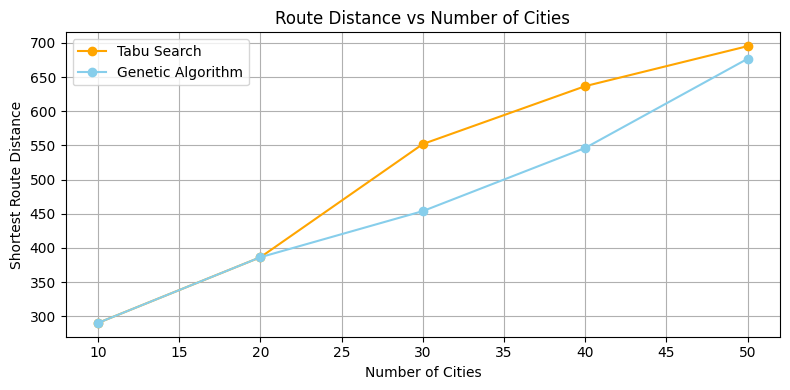

In [61]:
#  TABU SEARCH vs GENETIC ALGORITHM – FINAL COMPARISON

# Use the same city sizes as earlier
city_sizes = [10, 20, 30, 40, 50]

# Convert lists collected during runs
tabu_times = np.array(tabu_times_list)
ga_times = np.array(ga_times_list)
tabu_costs = np.array(tabu_distances_list)
ga_costs = np.array(ga_distances_list)

# Space Complexity (same for both algorithms)
space_complexity = [n**2 for n in city_sizes]


#   COMPARISON MATRIX (TABLE OUTPUT)

comparison_matrix = pd.DataFrame({
    "Cities": city_sizes,
    "Tabu Time (s)": tabu_times,
    "GA Time (s)": ga_times,
    "Tabu Best Cost": tabu_costs,
    "GA Best Cost": ga_costs,
    "Estimated Space Complexity (n²)": space_complexity
})


print(" COMPARISON MATRIX")
print(" Tabu Search vs Genetic Algorithm")

print(comparison_matrix.to_string(index=False))



#  PLOT 1 — ROUTE DISTANCE VS NUMBER OF CITIES

plt.figure(figsize=(8, 4))
plt.plot(city_sizes, tabu_costs, marker='o', color='orange',
         label="Tabu Search")
plt.plot(city_sizes, ga_costs, marker='o', color='skyblue',
         label="Genetic Algorithm")

plt.title("Route Distance vs Number of Cities")
plt.xlabel("Number of Cities")
plt.ylabel("Shortest Route Distance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



#  PLOT 2 — EXECUTION TIME VS NUMBER OF CITIES

plt.figure(figsize=(8, 4))
plt.plot(city_sizes, tabu_times, marker='o', color='orange',
         label="Tabu Search")
plt.plot(city_sizes, ga_times, marker='o', color='skyblue',
         label="Genetic Algorithm")

plt.title("Execution Time vs Number of Cities")
plt.xlabel("Number of Cities")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Key Findings: Tabu Search vs Genetic Algorithm
**1. Solution Quality (Best Cost)**
The performance gap increases as the number of cities grows, indicating better scalability of GA in solution quality.

**2. Execution Time**
Tabu Search is significantly faster than the Genetic Algorithm across all problem sizes.

**3. Scalability with Problem Size**
As the number of cities increases, both algorithms experience increased cost and runtime.

## Tabu Search Hyper Parameter Tunning 

In [62]:
def tabu_search_tuned(coords, cities, tabu_tenure= 10, iterations= None, num_cities=None):
    """
    Tabu Search (Version 3: Hyperparameter Tuned)
    - Uses 2-OPT Swap.
    - Uses O(1) Delta Evaluation (Fast Math).
    """

    random.seed(21)
    progress = []
    start_time = time.time()

    
    # 1. YOUR PREFERRED INITIALIZATION BLOCK
    # ---------------------------------------------------------
    # Choose subset of cities
    if num_cities:
        coords_used = coords[:num_cities]
        cities_used = cities[:num_cities]
    else:
        coords_used = coords
        cities_used = cities

    n = len(coords_used) # Number of cities in the current problem

    # Initial random route
    current = generate_initial_route(n)
    best = current[:] # Initialize global best
    best_cost = route_cost(best, coords_used) # Calculate initial full cost

    # CRITICAL: We need this variable to track cost incrementally.
    # Instead of re-calculating the full route cost every time (slow),
    # we will just add/subtract the difference (delta) to this variable.
    current_cost = best_cost 
    
    tabu_list = {} # Initialize Tabu List
    
    #Dynamic Iterations Logic
    if iterations is None:
        iterations = n * 10

    
    # 2. MAIN LOOP (Optimized O(1))
    # ---------------------------------------------------------
    for step in range(iterations):

        best_move_delta = float("inf") # Track the best cost change found in this loop
        best_move = None # Track the indices (i, j) of that best move
        
        # Explore 2-opt neighborhood (Nested Loops)
        # We look at every possible segment reversal
        for i in range(1, n - 1):      
            for j in range(i + 1, n):  

                #  OPTIMIZATION START: O(1) DELTA EVALUATION 
                #Instead of creating the 'neighbor' list and running route_cost() (Slow),
                # we only look at the 4 edges that change.
                
                # Indices of the 4 cities involved in the cut
                idx_A = current[i - 1] # The city before the swap start
                idx_B = current[i]     # The start of the swap segment
                idx_C = current[j]     # The end of the swap segment
                idx_D = current[(j + 1) % n]  # The city after the swap end

                # Calculate lengths of the edges being REMOVED
                d_removed = distance(coords_used[idx_A], coords_used[idx_B]) + \
                            distance(coords_used[idx_C], coords_used[idx_D])
                
                # Calculate lengths of the edges being ADDED
                d_added   = distance(coords_used[idx_A], coords_used[idx_C]) + \
                            distance(coords_used[idx_B], coords_used[idx_D])
                
                delta = d_added - d_removed
                # --- OPTIMIZATION END ---

                cand_cost = current_cost + delta # Predict the new cost
                move = (i, j) # The signature of this move

                # Tabu Checks
                is_tabu = move in tabu_list
                # Aspiration Criteria: Allow Tabu move if it beats the Global Best
                aspiration = cand_cost < best_cost 

                if (not is_tabu) or aspiration:
                    if delta < best_move_delta:
                        best_move_delta = delta
                        best_move = move

        # If no valid move was found, stop
        if best_move is None:
            break

        # Update current solution ONLY ONCE per iteration
        i, j = best_move
        current = two_opt_swap(current, i, j) # Perform the actual list reversal (2-opt swap)
        current_cost += best_move_delta       # Update cost using the math result

        # Update tabu list
        tabu_list[best_move] = step + tabu_tenure
        tabu_list = {m: t for m, t in tabu_list.items() if t > step} # Clean up expired tabu entries

        # Update global best
        if current_cost < best_cost:
            best = current[:]
            best_cost = current_cost

        progress.append((step+1, best_cost)) # Record progress

    runtime = time.time() - start_time # Stop timer
    
    # Return results
    return best, best_cost, progress, runtime, coords_used, cities_used

## CODE FOR VISUALIZATION REPRESENTATION


Running Tuned Tabu Search on 10 cities...
Shortest Route Distance: 290.30677379181265
Runtime: 0.008692502975463867 seconds
First City: City_8
Last City: City_3



Running Tuned Tabu Search on 20 cities...
Shortest Route Distance: 386.42968948347027
Runtime: 0.09005069732666016 seconds
First City: City_5
Last City: City_18


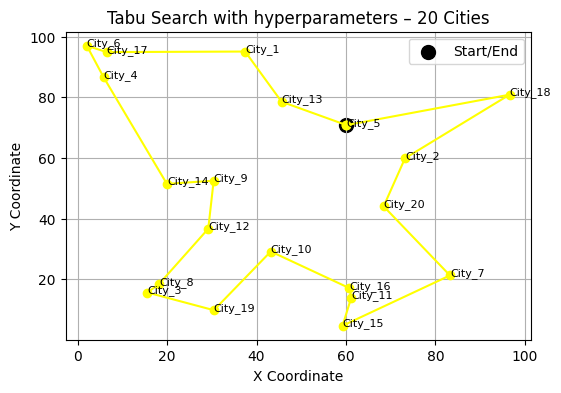


Running Tuned Tabu Search on 30 cities...
Shortest Route Distance: 467.0439040380583
Runtime: 0.3273181915283203 seconds
First City: City_12
Last City: City_10


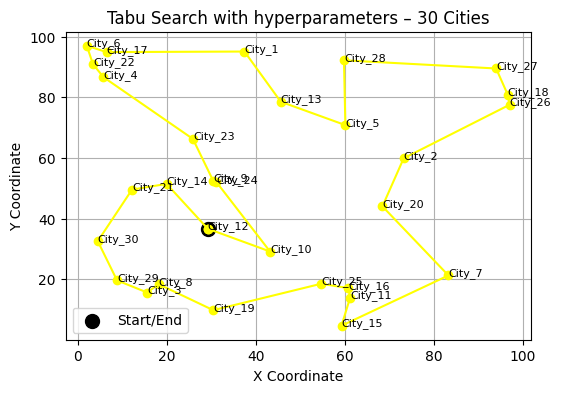


Running Tuned Tabu Search on 40 cities...
Shortest Route Distance: 493.2790715320258
Runtime: 0.7178888320922852 seconds
First City: City_22
Last City: City_6



Running Tuned Tabu Search on 50 cities...
Shortest Route Distance: 580.8888909919465
Runtime: 1.2480041980743408 seconds
First City: City_30
Last City: City_29


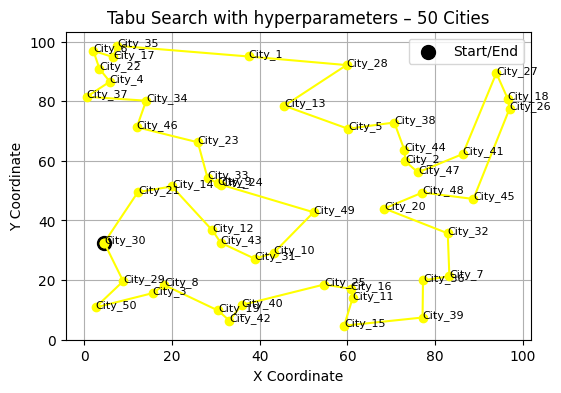

In [63]:
city_sizes = [10, 20, 30, 40, 50]

# RESET tuned TS storage
tabu3_results = []
tabu3_distances = []
tabu3_times = []

for size in city_sizes:

    print(f"\nRunning Tuned Tabu Search on {size} cities...")

    # Dynamic iterations (hyperparameter tuning logic)
    iterations = size * 10    # Example: 100, 200, 300, 400, 500

    best_route, best_distance, progress, runtime, coords_used, cities_used = tabu_search_tuned(
        coords, cities, tabu_tenure=10, iterations=iterations, num_cities=size
    )

    first_city = cities_used[best_route[0]]
    last_city = cities_used[best_route[-1]]

    print("Shortest Route Distance:", best_distance)
    print("Runtime:", runtime, "seconds")
    print("First City:", first_city)
    print("Last City:", last_city)

    # store values for comparison
    tabu3_distances.append(best_distance)
    tabu3_times.append(runtime)

    tabu3_results.append({
        "Cities": size,
        "Distance": best_distance,
        "Time (s)": runtime,
        "First City": first_city,
        "Last City": last_city
    })

    # PLOT
    plot_route(
        best_route,
        coords_used,
        cities_used,
        f"Tabu Search with hyperparameters – {size} Cities"
    )


In [64]:
summary_tabu_v3 = pd.DataFrame(tabu3_results)
print("\nSummary of Tabu Search V3 Results:")
display(summary_tabu_v3)



Summary of Tabu Search V3 Results:


Cities    Distance  Time (s) First City Last City
0      10  290.306774  0.008693     City_8    City_3
1      20  386.429689  0.090051     City_5   City_18
2      30  467.043904  0.327318    City_12   City_10
3      40  493.279072  0.717889    City_22    City_6
4      50  580.888891  1.248004    City_30   City_29

## Enhanced Tabu Search: Key Modifications
**Dynamic Iteration Control**

- Iteration count automatically scales with problem size (iterations = n × 10) when not explicitly specified.

**2-OPT Neighbourhood Structure**

- Replaces simple swap operations with 2-OPT segment reversals to improve local search effectiveness.

**O(1) Delta Cost Evaluation**

- Eliminates full tour cost recomputation by using incremental cost updates.

## Compair Tabu Search and Tabu Search Hyperparameter Tuning

COMPARISON: Tabu Search V2 vs Tabu Search V3


Cities  TS-V2 Time (s)  TS-V3 Time (s)  TS-V2 Cost  TS-V3 Cost  \
0      10        0.062247        0.008693  290.306774  290.306774   
1      20        0.561407        0.090051  386.429689  386.429689   
2      30        1.694044        0.327318  552.040194  467.043904   
3      40        3.697888        0.717889  636.753864  493.279072   
4      50        6.919987        1.248004  695.274442  580.888891   

   Estimated Space (n^2)  
0                    100  
1                    400  
2                    900  
3                   1600  
4                   2500

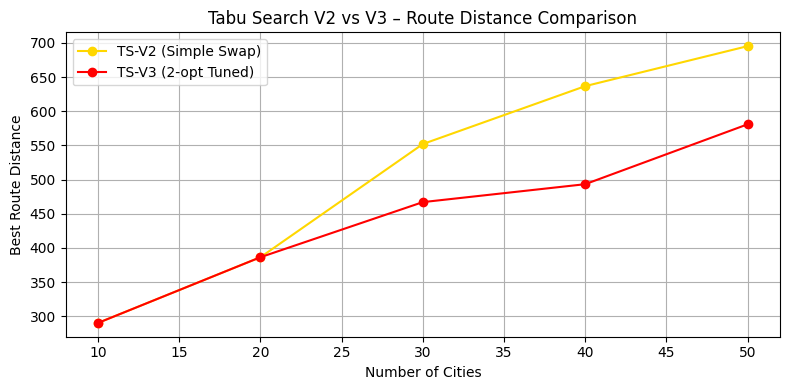

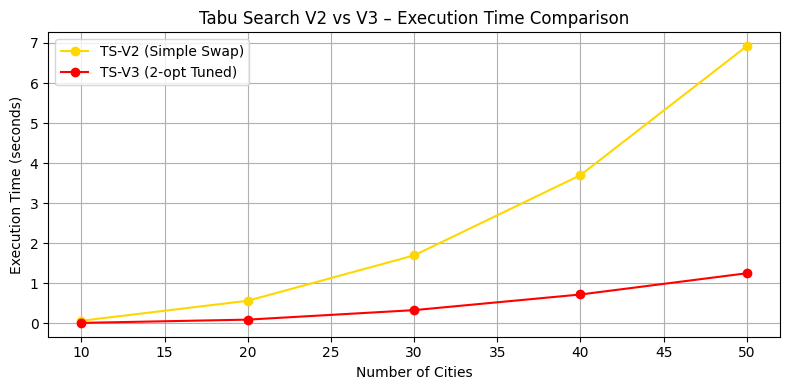

In [71]:
# COMPARISON: TABU SEARCH V2 (Simple Swap) vs V3 (2-opt Tuned)

city_sizes = [10, 20, 30, 40, 50]

# Convert lists to NumPy arrays for easy plotting
ts2_times = np.array(tabu2_times)
ts3_times = np.array(tabu3_times)

ts2_costs = np.array(tabu2_distances)
ts3_costs = np.array(tabu3_distances)

space_complexity = [n**2 for n in city_sizes]   # For reporting only



# 1. COMPARISON MATRIX TABLE

comparison_df = pd.DataFrame({
    "Cities": city_sizes,
    "TS-V2 Time (s)": ts2_times,
    "TS-V3 Time (s)": ts3_times,
    "TS-V2 Cost": ts2_costs,
    "TS-V3 Cost": ts3_costs,
    "Estimated Space (n^2)": space_complexity
})

print("COMPARISON: Tabu Search V2 vs Tabu Search V3")
display(comparison_df)



# 2. PLOT — BEST DISTANCE ACROSS CITY SIZES
# ------------------------------------------------------------

plt.figure(figsize=(8, 4))
plt.plot(city_sizes, ts2_costs, marker='o', label='TS-V2 (Simple Swap)', color='gold')
plt.plot(city_sizes, ts3_costs, marker='o', label='TS-V3 (2-opt Tuned)', color='red')

plt.title("Tabu Search V2 vs V3 – Route Distance Comparison")
plt.xlabel("Number of Cities")
plt.ylabel("Best Route Distance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



#  3. PLOT — EXECUTION TIME ACROSS CITY SIZES
# ------------------------------------------------------------

plt.figure(figsize=(8, 4))
plt.plot(city_sizes, ts2_times, marker='o', label='TS-V2 (Simple Swap)', color='gold')
plt.plot(city_sizes, ts3_times, marker='o', label='TS-V3 (2-opt Tuned)', color='red')

plt.title("Tabu Search V2 vs V3 – Execution Time Comparison")
plt.xlabel("Number of Cities")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Key Insights: Tabu Search vs Tabu Search Tuned
**Solution Quality (Cost)**

- The difference in solution quality becomes more noticeable as problem size increases, suggesting more effective optimisation in TS-V3.

**Execution Time** 

- TS-V3 consistently demonstrates lower execution time with more gradual runtime growth compared to TS-V2

**Scalability** 

- TS-V2 becomes less efficient as problem size increases due to higher computational effort during neighbourhood evaluation.


## Genetic Algorithm Hyperparameter Tuning

In [66]:
def run_ga(coords, cities, pop_size=100, generations=250, mutation_rate=0.1, apply_twoopt=True):
    """
    - apply_twoopt=True: Hybrid GA 
    """
    seed = 21 # fixed seeds
    random.seed(seed)       
    np.random.seed(seed)
    
    start_time = time.time()
    n = len(coords)
    progress = [] 

    # Initialize population
    population = initialize_population(pop_size, n)

    # Track global best
    hp_route = min(population, key=lambda r: route_cost(r, coords))
    hp_cost = route_cost(hp_route, coords) # Calculate initial best cost
    
    progress.append(hp_cost)# Record starting poin

    for _ in range(generations):

         # HYBRID FEATURE: ELITE REFINEMENT 
        # If Hybrid mode is ON, we force the best solution to be locally optimized.
        if apply_twoopt:
             # Refine the elite solution
             hp_route = apply_two_opt(hp_route, coords, attempts=40)
             hp_cost = route_cost(hp_route, coords)

        new_gen = [hp_route]  # Elitism

        # Reproduction Loop
        while len(new_gen) < pop_size:
            p1 = tournament_selection(population, coords) # Pick parents based on fitness (Tournament)
            p2 = tournament_selection(population, coords)
            
            child = crossover(p1, p2) # Crossover: Mix genes
            child = mutate(child, mutation_rate) # Mutation: Random chance to swap cities

             # Running 2-opt on EVERY child is too slow. 
             # We only apply it to 10% of children to balance speed vs. quality.
            if apply_twoopt and random.random() < 0.1:
                child = apply_two_opt(child, coords, attempts=40)

            new_gen.append(child) # Add offspring to new generation

        population = new_gen # Replace old population

        # Check current best
        current_best = min(population, key=lambda r: route_cost(r, coords))
        current_cost = route_cost(current_best, coords)
        # Update global best if the new generation produced a winner
        if current_cost < hp_cost:
            hp_route = current_best
            hp_cost = current_cost
            
        progress.append(hp_cost) # Track progress

    hp_time = time.time() - start_time # Stop timer
    
    # Return values
    return hp_route, hp_cost, hp_time, progress


## CODE FOR VISUALIZATION REPRESENTATION


Running GA-Hyperparameter on 10 cities...
[GA-HP] Cost: 290.31, Time: 2.87s
First City: City_8
Last City: City_3


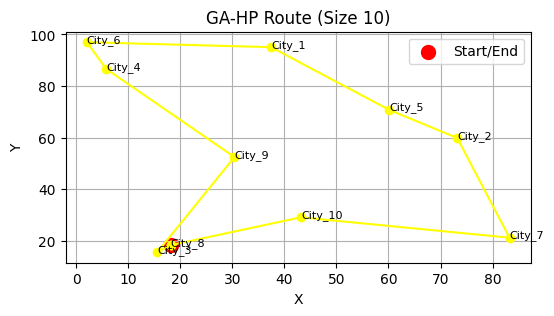


Running GA-Hyperparameter on 20 cities...
[GA-HP] Cost: 386.43, Time: 8.82s
First City: City_14
Last City: City_4


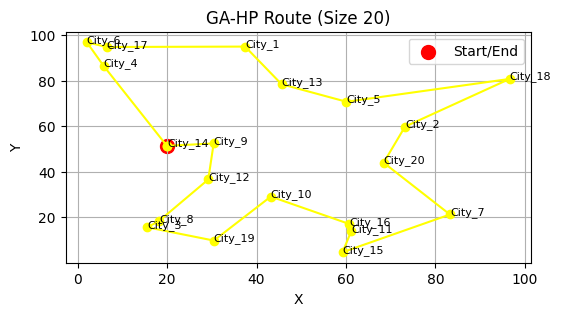


Running GA-Hyperparameter on 30 cities...
[GA-HP] Cost: 498.37, Time: 18.36s
First City: City_12
Last City: City_14


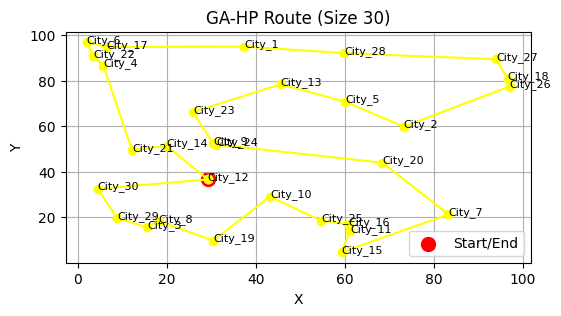


Running GA-Hyperparameter on 40 cities...
[GA-HP] Cost: 546.54, Time: 30.96s
First City: City_4
Last City: City_26



Running GA-Hyperparameter on 50 cities...
[GA-HP] Cost: 662.34, Time: 50.74s
First City: City_30
Last City: City_41


In [67]:
# Ensure the results list is initialized
ga_results = [] 
ga_hp_distances_list = []
ga_hp_times_list = []

sizes = [10, 20, 30, 40, 50]

for size in sizes:
    subset_coords = coords[:size]
    subset_cities = cities[:size]

    generations_dynamic = size * 10 # Dynamic Generations
    
    random.seed(21)

    print(f"\nRunning GA-Hyperparameter on {size} cities...")

    # --- CRITICAL FIXES ---
    # 1. Calling 'run_ga' (Matches your new function name)
    # 2. Passing 'subset_cities' (Matches the required argument)
    # 3. Unpacking 4 values (hp_route, hp_cost, hp_time, _) to match the return statement
    hp_route, hp_cost, hp_time, _ = run_ga(
        subset_coords,
        subset_cities,       # Required argument
        pop_size=200,        # tuned
        generations=generations_dynamic, # tuned
        mutation_rate=0.1,   # tuned
        apply_twoopt=True    # enable 2-opt
    )

    ga_hp_distances_list.append(hp_cost)
    ga_hp_times_list.append(hp_time)

    print(f"[GA-HP] Cost: {hp_cost:.2f}, Time: {hp_time:.2f}s")
    print("First City:", subset_cities[hp_route[0]])
    print("Last City:", subset_cities[hp_route[-1]])

    # Append results to the ga_results list
    ga_results.append({
        'Size (N)': size,
        'Pop Size': 200,
        'Generations Cap': generations_dynamic,
        'Final Cost': hp_cost,
        'Runtime (s)': hp_time,
    })

    # -------------------------------
    # PLOT GA-HP ROUTE
    # -------------------------------
    route_loop = hp_route + [hp_route[0]]
    x_vals = [subset_coords[i][0] for i in route_loop]
    y_vals = [subset_coords[i][1] for i in route_loop]

    plt.figure(figsize=(6, 3))
    plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='yellow')

    for idx in hp_route:
        x, y = subset_coords[idx]
        plt.text(x, y, subset_cities[idx], fontsize=8)

    plt.scatter(
        subset_coords[hp_route[0]][0],
        subset_coords[hp_route[0]][1],
        color='red', s=100, label='Start/End'
    )

    plt.title(f"GA-HP Route (Size {size})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.show()

## Enhanced Genetic Algorithm: Key Modifications

**Population Size**

- Tested values of 100, 200, 300, and 500; a population size of 200 showed the best performance and reliability.

**Mutation Rate**

- Evaluated multiple mutation rates; 0.1 provided the most stable convergence.

**Dynamic Generations**

- Applied dynamic generation control (generations = N × 10) to ensure consistent convergence without unnecessary computation.

## Comparison between Genetic Algorithm and Genetic Algorithm with Hyperparameter Tuning 


  GA vs GA-Hyperparameter
 Cities    GA Cost  GA Time (s)  GA Space (pop*n)  GA-HP Cost  GA-HP Time (s)  GA-HP Space (pop*n)
     10 290.306774     3.364798              1000  290.306774        2.872727                 1200
     20 386.429689     5.504110              2000  386.429689        8.824269                 2400
     30 453.902302     7.881582              3000  498.372887       18.359274                 3600
     40 546.291737    11.067623              4000  546.542716       30.958772                 4800
     50 676.756042    12.630550              5000  662.339347       50.740936                 6000


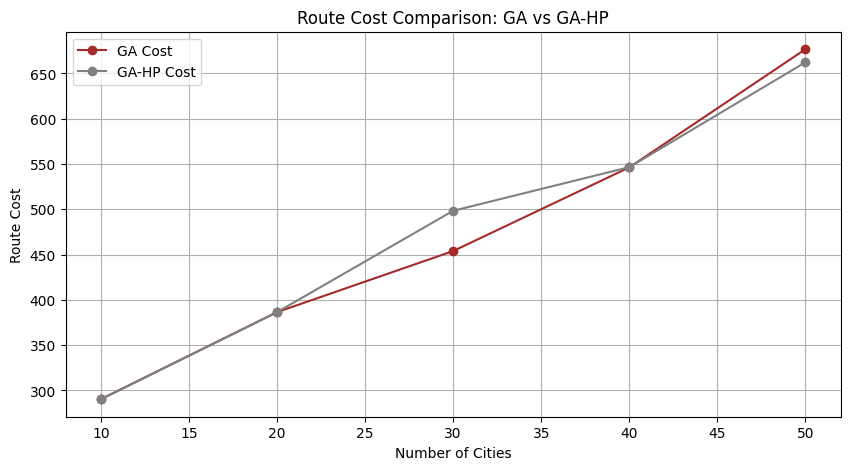

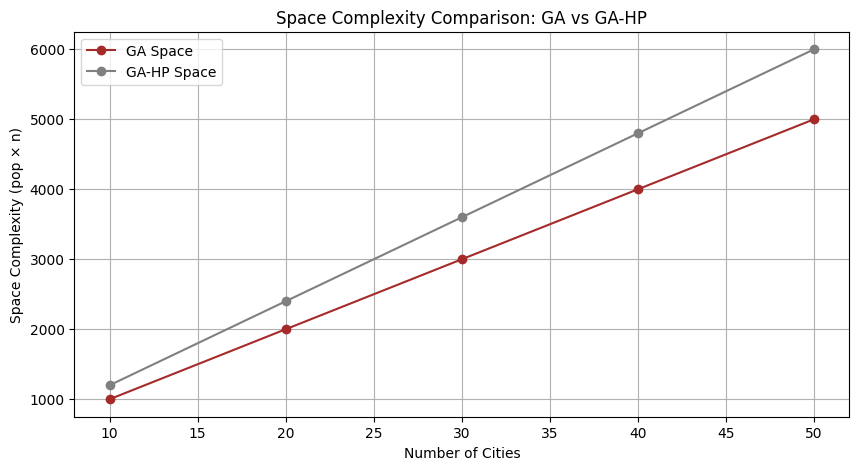

In [68]:
#     COMPARISON: BASELINE GA vs GA-HYPERPARAMETER (GA-HP)


city_sizes = [10, 20, 30, 40, 50]

# Convert to numpy arrays
ga_costs = np.array(ga_distances_list)
ga_times = np.array(ga_times_list)

ga_hp_costs = np.array(ga_hp_distances_list)
ga_hp_times = np.array(ga_hp_times_list)

# Space complexity = population_size × number_of_cities
# Baseline GA used pop=100
# GA-HP used pop=120 (your tuned value)
ga_space = np.array([100 * n for n in city_sizes])
ga_hp_space = np.array([120 * n for n in city_sizes])


# Create Comparison Table
# ------------------------------------------------------------
comparison_df = pd.DataFrame({
    "Cities": city_sizes,
    "GA Cost": ga_costs,
    "GA Time (s)": ga_times,
    "GA Space (pop*n)": ga_space,
    
    "GA-HP Cost": ga_hp_costs,
    "GA-HP Time (s)": ga_hp_times,
    "GA-HP Space (pop*n)": ga_hp_space
})

print("\n  GA vs GA-Hyperparameter")
print(comparison_df.to_string(index=False))


# Plot 1: Route Cost Comparison
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(city_sizes, ga_costs, marker='o', label="GA Cost", color='brown')
plt.plot(city_sizes, ga_hp_costs, marker='o', label="GA-HP Cost", color='grey')
plt.title("Route Cost Comparison: GA vs GA-HP")
plt.xlabel("Number of Cities")
plt.ylabel("Route Cost")
plt.grid(True)
plt.legend()
plt.show()


# Plot 2: Runtime Comparison
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(city_sizes, ga_times, marker='o', label="GA Time", color='brown')
plt.plot(city_sizes, ga_hp_times, marker='o', label="GA-HP Time", color='grey')
plt.title("Execution Time Comparison: GA vs GA-HP")
plt.xlabel("Number of Cities")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()


# Plot 3: Space Complexity Comparison
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(city_sizes, ga_space, marker='o', label="GA Space", color='brown')
plt.plot(city_sizes, ga_hp_space, marker='o', label="GA-HP Space", color='grey')
plt.title("Space Complexity Comparison: GA vs GA-HP")
plt.xlabel("Number of Cities")
plt.ylabel("Space Complexity (pop × n)")
plt.grid(True)
plt.legend()
plt.show()



## Key Findings: Genetic Algorithm (GA) vs Hyperparameter-Tuned GA (GA-HP)

**Solution Quality (Cost)**

- Hyperparameter tuning does not consistently improve solution quality across all problem sizes.

**Execution Time**

- GA demonstrates better runtime scalability compared to GA-HP.

**Space Complexity**

- GA-HP consistently requires more memory as compared to GA, this is because increased population size.



## Compairing Tabu_Search Hyperparameter Tuning and Genetic Algorithm Hyperparameter Tuning

In [69]:
#     GA-HYPERPARAMETER vs TABU-HYPERPARAMETER COMPARISON

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

city_sizes = [10, 20, 30, 40, 50]

# Convert to numpy arrays for safety
ts3_costs = np.array(tabu3_distances)
ts3_times = np.array(tabu3_times) 
ga_hp_costs = np.array(ga_hp_distances_list)
ga_hp_times = np.array(ga_hp_times_list)

# Space Complexity (example assumption: pop size for GA, tabu list scale for TS)
ts_hp_space = np.array([size * 10 for size in city_sizes])   # simple example
ga_hp_space = np.array([150 * size for size in city_sizes])  # tuned GA pop_size * n



# Create Comparison Table
# ------------------------------------------------------------
comparison_df = pd.DataFrame({
    "Cities": city_sizes,

    "TS-HP Cost":ts3_costs,
    "TS-HP Time":ts3_times,
    "TS-HP Space":ts_hp_space,

    "GA-HP Cost": ga_hp_costs,
    "GA-HP Time (s)": ga_hp_times,
    "GA-HP Space": ga_hp_space
})

print("\n TS-HP vs GA-HP Comparison")
print(comparison_df.to_string(index=False))


 TS-HP vs GA-HP Comparison
 Cities  TS-HP Cost  TS-HP Time  TS-HP Space  GA-HP Cost  GA-HP Time (s)  GA-HP Space
     10  290.306774    0.008693          100  290.306774        2.872727         1500
     20  386.429689    0.090051          200  386.429689        8.824269         3000
     30  467.043904    0.327318          300  498.372887       18.359274         4500
     40  493.279072    0.717889          400  546.542716       30.958772         6000
     50  580.888891    1.248004          500  662.339347       50.740936         7500


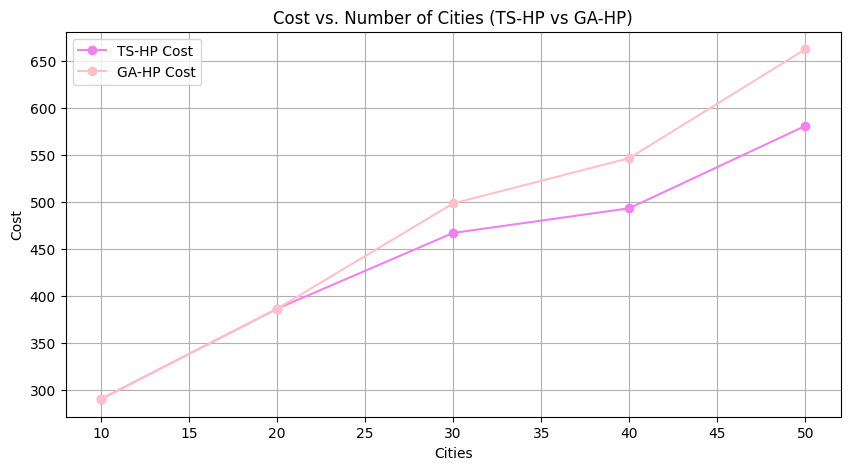

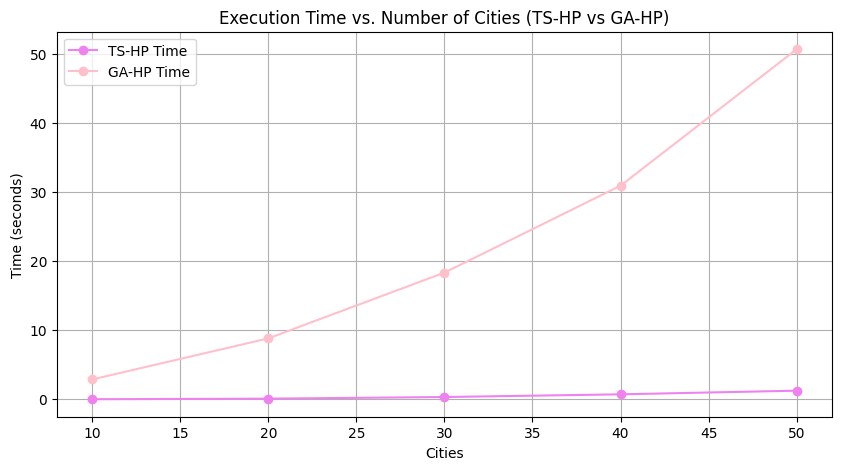

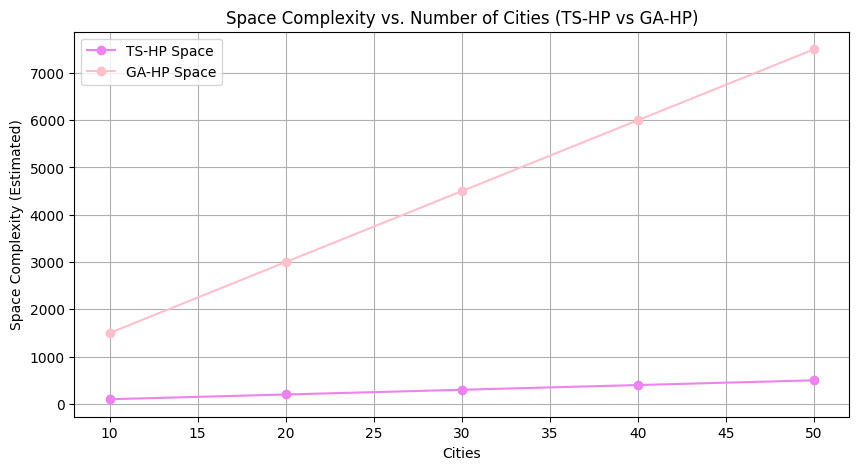

In [70]:
# Plot 1 – Cost vs. Number of Cities
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(city_sizes, ts3_costs, marker='o', color='violet', label="TS-HP Cost")
plt.plot(city_sizes, ga_hp_costs, marker='o', color='pink', label="GA-HP Cost")
plt.title("Cost vs. Number of Cities (TS-HP vs GA-HP)")
plt.xlabel("Cities")
plt.ylabel("Cost")
plt.grid(True)
plt.legend()
plt.show()



# Plot 2 – Time vs. Number of Cities
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(city_sizes, ts3_times, marker='o', color='violet', label="TS-HP Time")
plt.plot(city_sizes, ga_hp_times, marker='o', color='pink', label="GA-HP Time")
plt.title("Execution Time vs. Number of Cities (TS-HP vs GA-HP)")
plt.xlabel("Cities")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()



# Plot 3 – Space Complexity vs. Number of Cities
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(city_sizes, ts_hp_space, marker='o', color='violet', label="TS-HP Space")
plt.plot(city_sizes, ga_hp_space, marker='o', color='pink', label="GA-HP Space")
plt.title("Space Complexity vs. Number of Cities (TS-HP vs GA-HP)")
plt.xlabel("Cities")
plt.ylabel("Space Complexity (Estimated)")
plt.grid(True)
plt.legend()
plt.show()


## Key Findings: Hyperparameter-Tuned Tabu Search (TS-HP) vs Genetic Algorithm (GA-HP)
**1. Solution Quality (Cost)**

- The cost gap widens as problem size increases, indicating better optimisation efficiency of TS-HP under tuning.

**2. Execution Time**

- TS-HP is significantly faster than GA-HP across all problem sizes.

**3.Scalability**
- TS-HP demonstrates strong scalability in both runtime and solution quality as the number of cities increases.

- GA-HP scales poorly in runtime despite hyperparameter tuning

**4.Space Complexity**

- TS-HP uses substantially less memory, with space usage increasing linearly with problem size.

- GA-HP shows significantly higher space consumption, increasing rapidly as the number of cities grows.